# Web Scraping with Python and Selenium

## Libraries and settings

In [1]:
# Libraries
import os
import re
import json
import time
import random
import pandas as pd

from bs4 import BeautifulSoup

from prettytable import from_csv

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC

# Set up Chrome options
options = webdriver.ChromeOptions()
options.add_argument('--headless') #kein Browserfenster geöffnet wird (läuft im Hintergrund)
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Path to ChromeDriver
service = Service('/usr/local/bin/chromedriver')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /workspaces/data_ingestion/09_Web_Scraping_Python_Selenium_Cloud


## Import a list with user agents

In [2]:
# Liste mit User-Agents für Rotation
ua_path = "user_agents.txt" # Verschleiern wer die Anfrage macht an den Webserver fürs scraping (denn scraping wird regelmässig geblockt)
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

## Chrome headless mode (without graphical user interface)

In [3]:
# Initialize the driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://store.dji.com')

# Get current url
print(driver.current_url) #nur URL wird gescrapt

# Return the full page HTML code
# print(driver.page_source)

# Gets the page's title
print(driver.title)

# Close driver
driver.close()


https://store.dji.com/nl
DJI Store - Official Store for DJI Drones, Gimbals and Accessories (Netherlands)


## Creating screenshots from a website

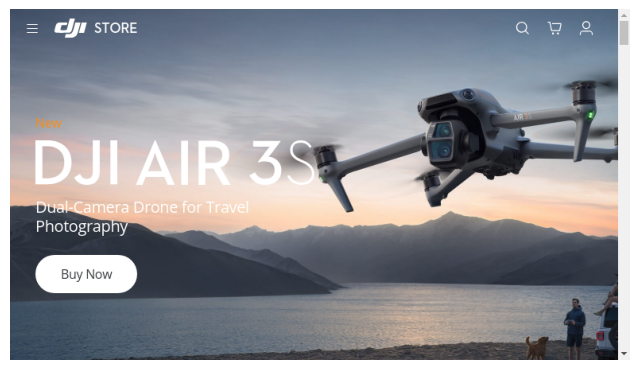

In [4]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://store.dji.com')

# Screenshot
driver.save_screenshot('screenshot.png')

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

# Close driver
driver.close()

## Locating elements

There are different methods available in the Selenium API to select elements on the page. You can use:

- Name
- Tag name
- Class name
- ID
- XPath
- CSS selectors

Use the inspect element function in Chrome to get these infos:
https://www.hostinger.com/tutorials/website/how-to-inspect-and-change-style-using-google-chrome

### Locating elements using XPath

Ein Deuce von 1932, der mittels Chopping und Cleaning modifiziert wurde


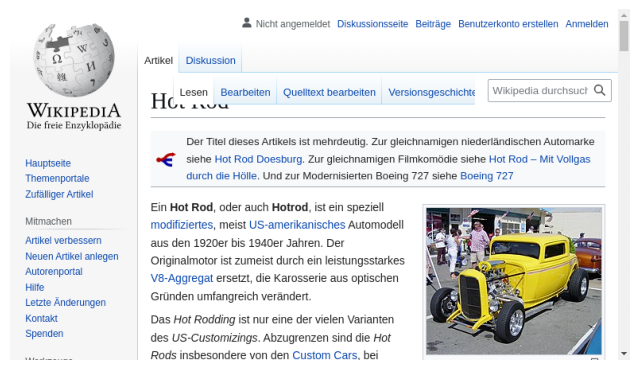

In [5]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://de.wikipedia.org/wiki/Hot_Rod')

# Screenshot
driver.save_screenshot('screenshot.png')

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

# Find element using xpath
text = driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[5]/div[1]/figure[1]/figcaption').text # Web Scraping: XPath wird oft verwendet, um HTML-Dokumente zu parsen und bestimmte Teile der Webseite zu extrahieren.
print(text)

# Close driver
driver.close()

### Locating elements using tag names

Darum gehts


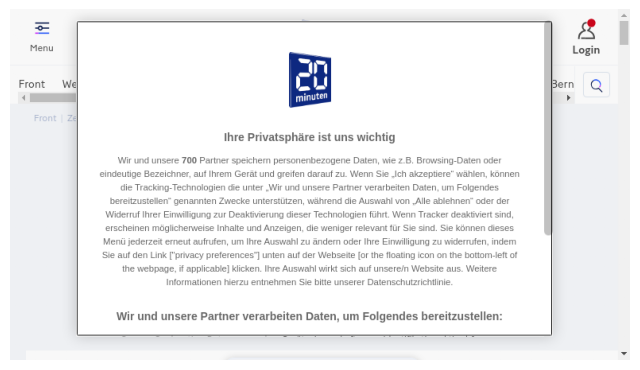

In [ ]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
#driver.get('https://www.tagesschau.de/wissen/klima/bienen-impfung-faulbrut-107.html')
driver.get('https://www.20min.ch/story/swiss-steel-swiss-steel-am-abgrund-duerfen-seit-einem-monat-nichts-mehr-sagen-103205805')

# Screenshot
driver.save_screenshot('screenshot.png')

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

# Find element using tag names
text = driver.find_element(By.TAG_NAME, 'h3').text
print(text)

# Close driver
driver.close()

## Sent and submit text on Wikipedia

VW Golf ist eine Pkw-Modellreihe der Kompaktklasse von Volkswagen. Sie wird seit 1974 produziert, seit Dezember 2019 in der achten Generation. Mit über 35 Millionen Exemplaren[1] ist der Golf eines der meistgebauten Autos der Welt.


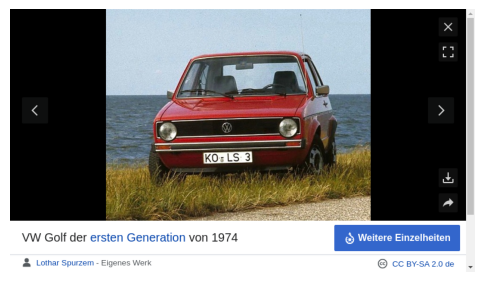

In [8]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://de.wikipedia.org')

# Fill in the search text
text_to_send = 'VW Golf'
element = driver.find_element(By.XPATH, '/html/body/div[4]/div[1]/div[2]/div/form/div/input[1]')
element.send_keys(text_to_send)

# Submit search text
element.submit()

# Extract text
element = driver.find_element(By.TAG_NAME, 'p').text
print(element)

# Wait until the website is showing up
time.sleep(5)

# Click link to image on page found
driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[5]/div[1]/figure[1]/a/img').click()

# Screenshot
time.sleep(5)
driver.save_screenshot('screenshot.png')

# Close driver
driver.close()

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(6,6))
plt.axis('off')
imgplot = plt.imshow(img)

## Pagination handling on https://www.minergie.ch

In [8]:
# Chrome-Driver - Chrome WebDriver von Selenium, um Daten von einer Webseite zu extrahieren und in eine Datei zu speichern.
driver = webdriver.Chrome(service=service, options=options)

# Open file-connection
MyFile = open('minergie_objects.txt', 'w', encoding='utf-8') # öffnet und erstellt eine textdatei, "w" damit wird Inhalt jedes Mal überschrieben

obj = {}    

# Loop through first 5 pages and save objects to file
for i in range(5):
    
    # Generating URLs using page numbers
    url = str('https://www.minergie.ch/de/gebaeude/gebaeudeliste/?canton=&country=&zip_place=&street_nr=&gid=&participator=&typeofuse=&constructiontype=&year=&sortby=date_asc&numres=12&p=' + str(i+1)) # blättert Webseiten durch
    time.sleep(1)
    driver.get(url)
    
    # Click 'I agree' button for cookie-management on first page
    if i == 1:
        driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/div[3]/div[1]/button[3]').click()
    else:
        pass
    
    print(str('--------- Page:' + str(i+1) + '-------------------------------'))
    
    for n in range(12): # Für jede der 5 Seiten gibt es eine weitere Schleife, die durch 12 Objekte auf der Seite geht (da jede Seite 12 Objekte enthält).
        
        path = str('/html/body/div[1]/div[4]/div[7]/div/div[' + str(n+1) + ']')

        obj['Object'] = driver.find_element(By.XPATH, path).text
        obj['Object'] = obj['Object'].replace("\n", "")
        print(obj['Object'])
        
        # Write to file
        MyFile.write(obj['Object'] + "\n")
        
# Close file-connection
MyFile.close()

# Close driver
driver.close()

--------- Page:1-------------------------------
MinergieProvisorischWinterthur 8404Neubau, MFHGebäude ZH-10367
Minergie-PProvisorischThun 3604Neubau, VerwaltungGebäude BE-719-P
MinergieDefinitivWilen b. Wollerau 8832Neubau, MFHGebäude SZ-1228
Minergie-PDefinitivLausanne 1018Neubau, MFH / Verwaltung / RestaurantGebäude VD-244-P, ... (5)
MinergieProvisorischLangnau am Albis 8135Neubau, EFHGebäude ZH-10365
MinergieProvisorischLangnau am Albis 8135Neubau, EFHGebäude ZH-10366
MinergieProvisorischAlten 8463Neubau, EFHGebäude ZH-10361, ... (4)
MinergieProvisorischAlten 8453Neubau, EFHGebäude ZH-10357, ... (4)
MinergieProvisorischAlten 8453Neubau, MFHGebäude ZH-10354, ... (3)
MinergieProvisorischZürich 8044Neubau, MFHGebäude ZH-10353
MinergieProvisorischZürich 8044Neubau, MFHGebäude ZH-10352
MinergieProvisorischZürich 8057Neubau, MFHGebäude ZH-10351
--------- Page:2-------------------------------
MinergieProvisorischMenziken 5737Neubau, MFHGebäude AG-6328
MinergieProvisorischMenziken 5737Neuba

## OpenStreetMap search location example

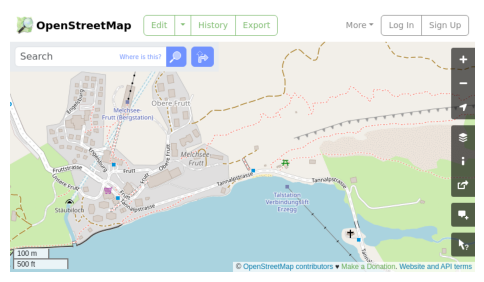

In [9]:
# Chrome driver
driver = webdriver.Chrome(service=service, options=options)

driver.get('https://www.openstreetmap.org/#map=9/46.7054/8.0283')
time.sleep(2)

# Submit address
element = driver.find_element(By.XPATH, '/html/body/div/div[1]/div[1]/form[1]/div/div[1]/div/input[1]')
element.send_keys("Melchsee-Frutt")
element.send_keys(Keys.RETURN)
time.sleep(2)

# Click info boxes -> entfernt unnötige Boxen auf der Webseite und gibt als Resultat nur den Ausschnitt der Karte wieder ohne Infos
try:
    # Click 1st info-box
    info = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[1]/div[5]/div[1]/div/button'))) 
    info.click()

    # Click 2nd info-box
    info = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[1]/div[6]/div[1]/div/button'))) 
    info.click()

    # Click 3rd info-box
    info = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[1]/div[7]/button')))
    info.click()
except:
    pass

# Screenshot of map
driver.save_screenshot('screenshot.png')
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(6,6))
plt.axis('off')
imgplot = plt.imshow(img)

# Close driver
driver.close()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-15 12:28:18
Python Version: 3.11.10
-----------------------------------
